# Plotly para visualización de datos

## Instalación de Seaborn

### Instalación desde la terminal

pip install seaborn

py -m pip install seaborn

## Importación de librerías y carga de datasets

In [36]:
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
df = pd.read_csv('covid_data.csv')
penguins = pd.read_csv('penguins.csv')

       continent     location        date  total_cases  total_deaths  \
0           Asia  Afghanistan  2020-01-05          0.0           0.0   
1           Asia  Afghanistan  2020-01-06          0.0           0.0   
2           Asia  Afghanistan  2020-01-07          0.0           0.0   
3           Asia  Afghanistan  2020-01-08          0.0           0.0   
4           Asia  Afghanistan  2020-01-09          0.0           0.0   
...          ...          ...         ...          ...           ...   
181646    Africa     Zimbabwe  2021-12-27     203746.0        4885.0   
181647    Africa     Zimbabwe  2021-12-28     203746.0        4885.0   
181648    Africa     Zimbabwe  2021-12-29     203746.0        4885.0   
181649    Africa     Zimbabwe  2021-12-30     203746.0        4885.0   
181650    Africa     Zimbabwe  2021-12-31     203746.0        4885.0   

       total_vaccinations  population  
0                    None    41128772  
1                    None    41128772  
2              

## Gráfico de Barras

### Preparación del dataset

In [42]:
conn = sqlite3.connect("C:/Users/herna/OneDrive/Documentos/Data Analysis/4- Portfolio/1- SQL - Covid/Covid_analysis.db")
query = """SELECT continent,location,date, total_cases,total_deaths,total_vaccinations,population FROM covid_data
WHERE continent IS NOT NULL AND date LIKE "2020%" OR date LIKE "2021%"
ORDER BY location, date"""
result_df = pd.read_sql_query(query,conn)
conn.close()

#Creando un df para usar grafico de barras
filtered_df = result_df[(result_df['continent'].notnull())&(result_df['location'].isin(['Peru','Colombia','Ecuador','Chile','Argentina']))]
df_1 = filtered_df.groupby('location').agg(total_cases = ('total_cases','max'),total_deaths = ('total_deaths','max'))

#agregando el death_rate
df_1['death_rate'] = (df_1['total_deaths'] / df_1['total_cases']) * 100
df_1['death_rate'] = df_1['death_rate'].round(6)

df_1.reset_index(inplace=True)
df_1 = df_1.sort_values(by='location')

print(df_1)

    location  total_cases  total_deaths  death_rate
0  Argentina    5559916.0      117830.0    2.119277
1      Chile    1799125.0       39013.0    2.168443
2   Colombia    5118254.0      129686.0    2.533794
3    Ecuador     541368.0       33647.0    6.215181
4       Peru    2272885.0      202454.0    8.907358


C:\Users\herna\AppData\Local\Temp\ipykernel_8424\4122063294.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barra1 = sns.barplot(x="location", y="total_cases", data=df_1, palette=['lightblue', 'grey','pink','yellow'])
C:\Users\herna\AppData\Local\Temp\ipykernel_8424\4122063294.py:1: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  barra1 = sns.barplot(x="location", y="total_cases", data=df_1, palette=['lightblue', 'grey','pink','yellow'])


Text(0.5, 1.0, 'Casos totales por pais')

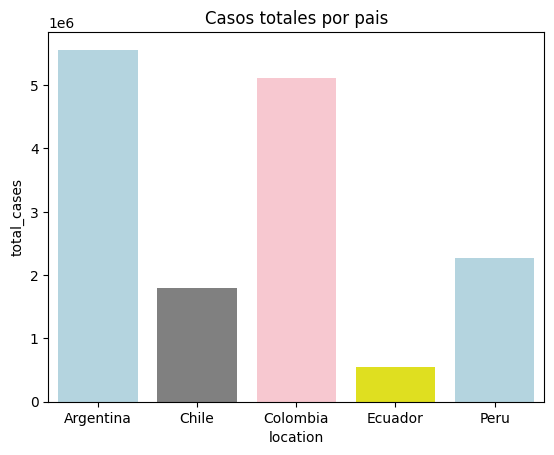

In [19]:
barra1 = sns.barplot(x="location", y="total_cases", data=df_1, palette=['lightblue', 'grey','pink','yellow'])
barra1.set_title('Casos totales por pais')

C:\Users\herna\AppData\Local\Temp\ipykernel_8424\2289349754.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barra2 = sns.barplot(x="location", y="total_deaths", data=df_1, palette=['lightblue', 'grey','pink','yellow','cyan'])


Text(0.5, 1.0, 'Muertes totales por pais')

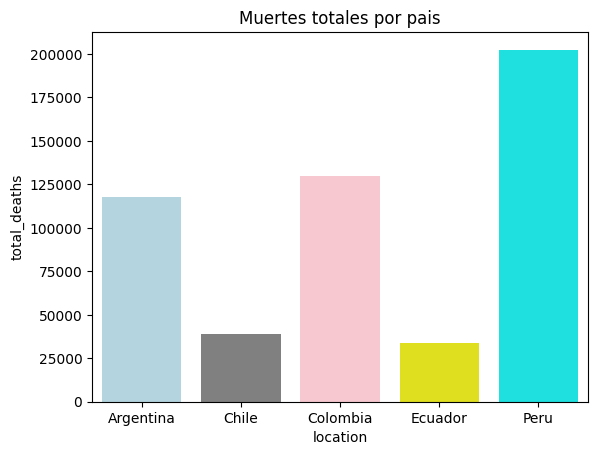

In [23]:

barra2 = sns.barplot(x="location", y="total_deaths", data=df_1, palette=['lightblue', 'grey','pink','yellow','cyan'])
barra2.set_title('Muertes totales por pais')

C:\Users\herna\AppData\Local\Temp\ipykernel_8424\2788322169.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barra3 = sns.barplot(x="location", y="death_rate", data=df_1, palette=['lightblue', 'grey','pink','yellow','cyan'])


Text(0.5, 1.0, 'Tasa de muertes por pais')

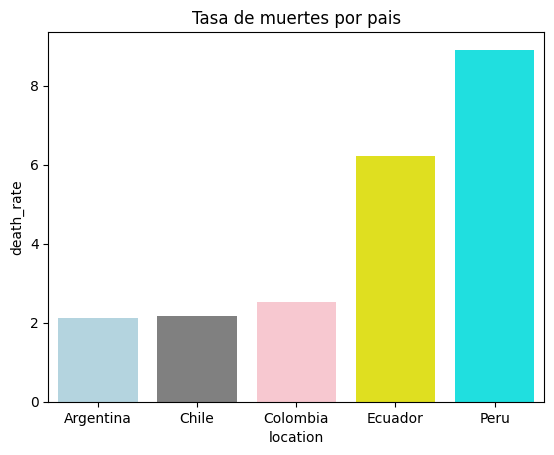

In [24]:
barra3 = sns.barplot(x="location", y="death_rate", data=df_1, palette=['lightblue', 'grey','pink','yellow','cyan'])
barra3.set_title('Tasa de muertes por pais')

## Gráfico de lineas

### Preparación del dataset

In [29]:
import sqlite3
conn = sqlite3.connect("C:/Users/herna/OneDrive/Documentos/Data Analysis/4- Portfolio/1- SQL - Covid/Covid_analysis.db")

query = """SELECT location, MAX(date) AS month, total_cases, total_deaths, 
round((CAST(total_deaths AS REAL)*100/CAST(total_cases AS REAL)),6) AS death_rate FROM covid_data
WHERE continent IS NOT NULL AND location IN ('Peru','Colombia','Ecuador','Chile','Argentina') AND strftime("%Y-%m", date) BETWEEN "2020-01" AND "2021-12"
GROUP BY location, strftime("%Y-%m", date)
ORDER BY location, month"""

df_2 = pd.read_sql_query(query,conn)
conn.close()

print(df_2)

      location       month  total_cases  total_deaths  death_rate
0    Argentina  2020-01-31            0             0         NaN
1    Argentina  2020-02-29            0             0         NaN
2    Argentina  2020-03-31         1282            70    5.460218
3    Argentina  2020-04-30         5464           411    7.521962
4    Argentina  2020-05-31        22406          1306    5.828796
..         ...         ...          ...           ...         ...
115       Peru  2021-08-31      2147285        198115    9.226302
116       Peru  2021-09-30      2171374        199182    9.173086
117       Peru  2021-10-31      2199876        200197    9.100377
118       Peru  2021-11-30      2231175        201026    9.009871
119       Peru  2021-12-31      2272885        202454    8.907358

[120 rows x 5 columns]


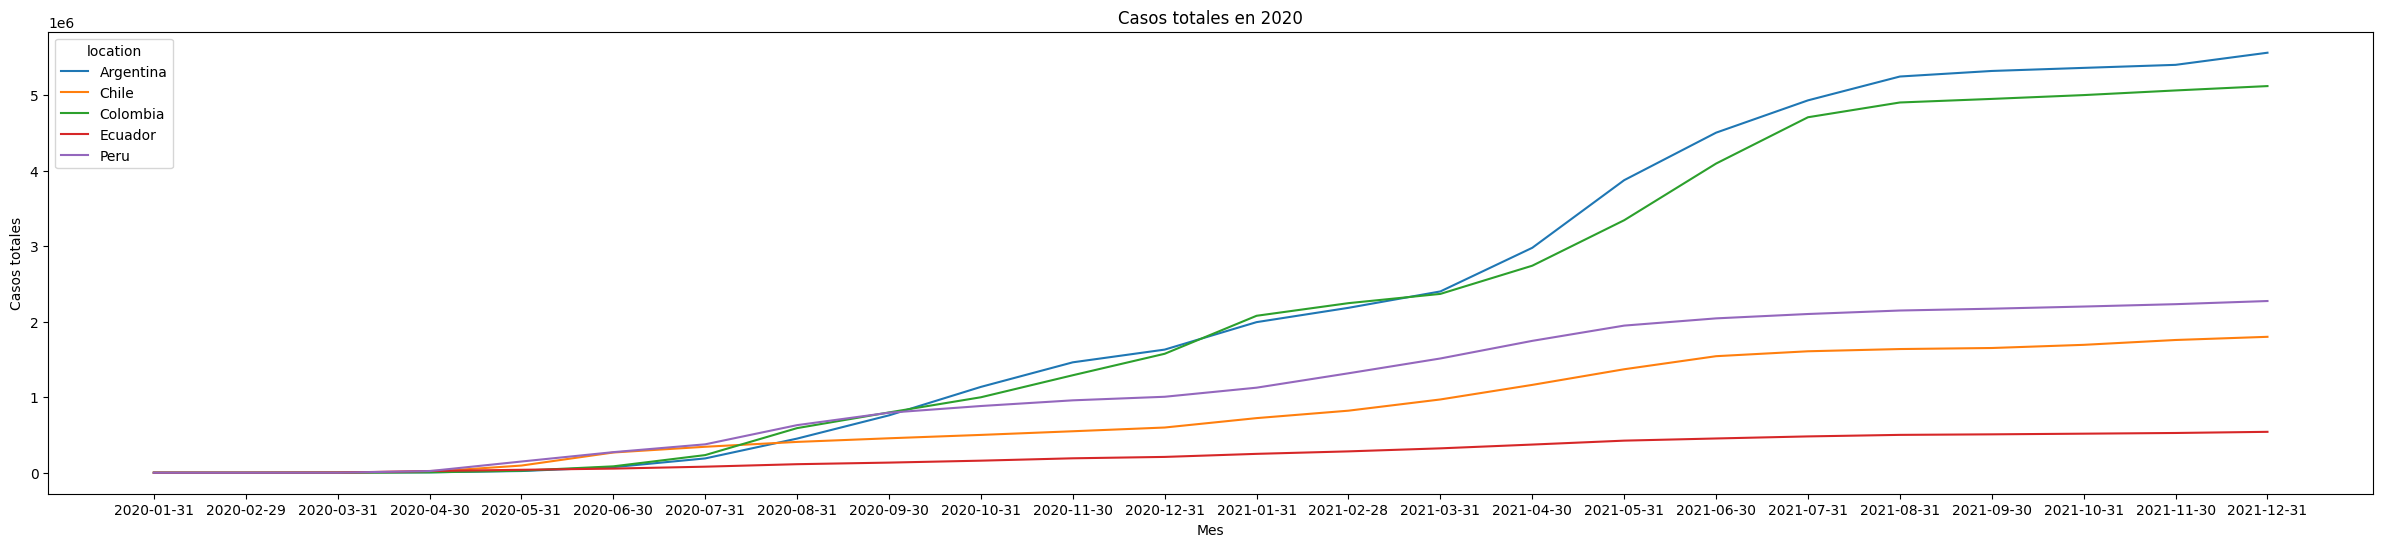

In [33]:
plt.figure(figsize=(30,6))
sns.lineplot(x='month', y='total_cases', hue='location', data=df_2)
plt.title('Casos totales en 2020')
plt.xlabel('Mes')
plt.ylabel('Casos totales')
plt.show()



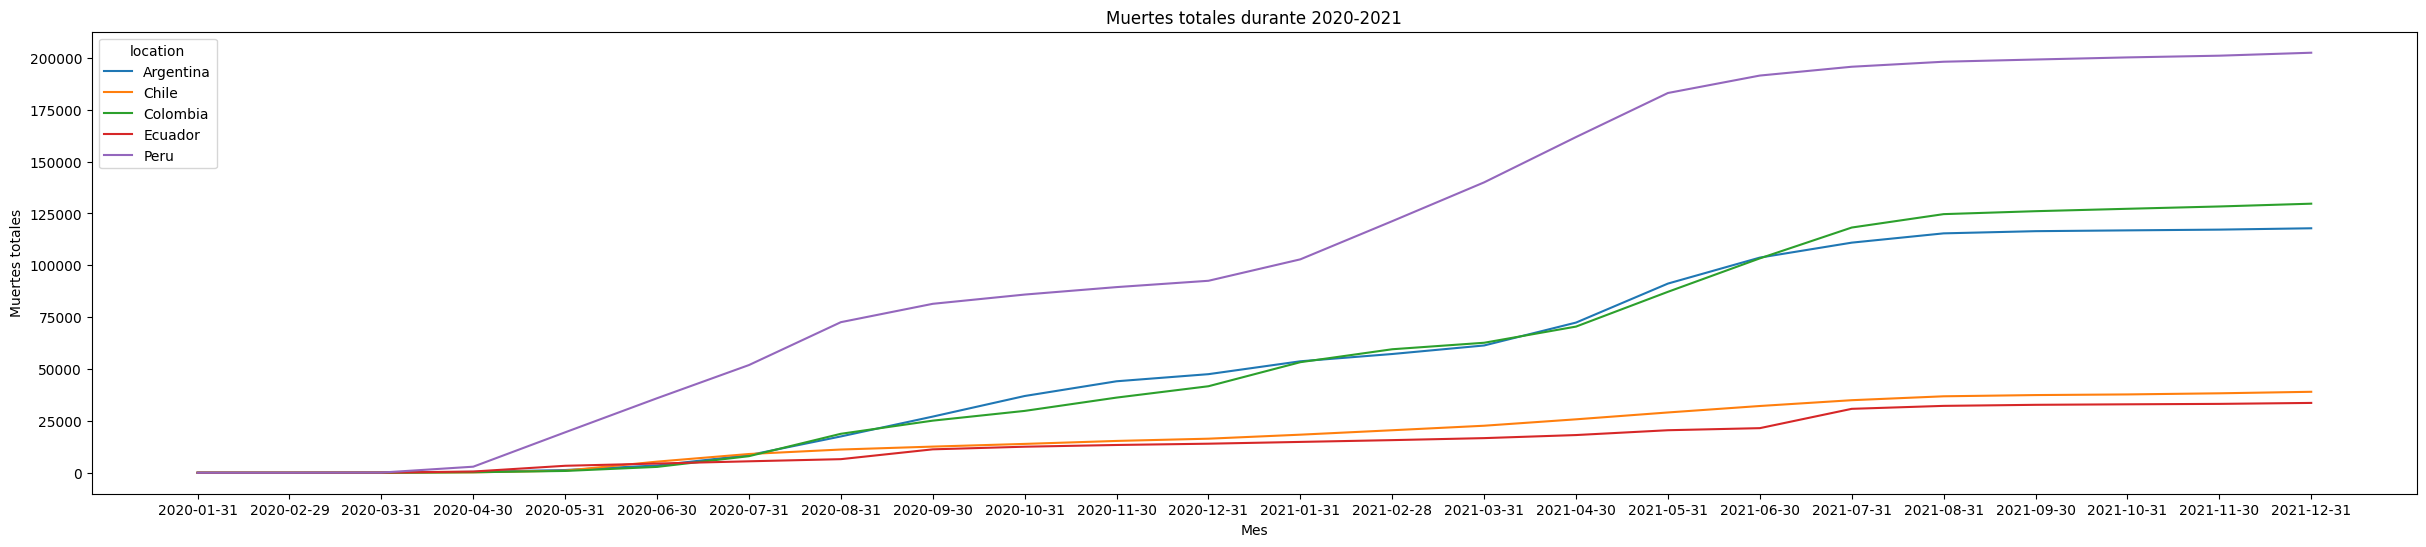

In [34]:
plt.figure(figsize=(30,6))
sns.lineplot(x='month', y='total_deaths', hue='location', data=df_2)
plt.title('Muertes totales durante 2020-2021')
plt.xlabel('Mes')
plt.ylabel('Muertes totales')
plt.show()


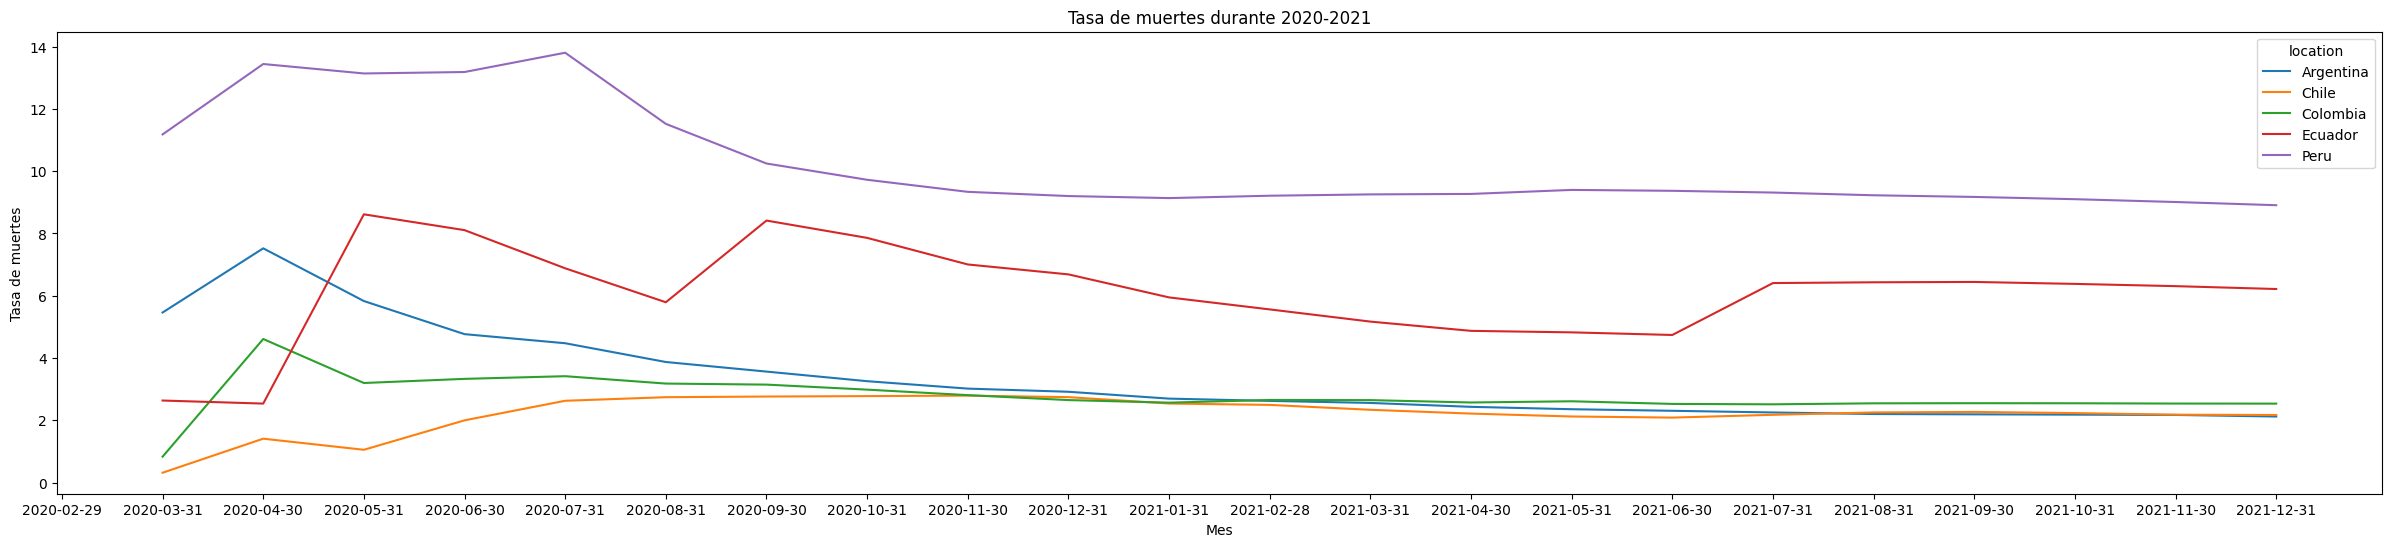

In [35]:
plt.figure(figsize=(30,6))
sns.lineplot(x='month', y='death_rate', hue='location', data=df_2)
plt.title('Tasa de muertes durante 2020-2021')
plt.xlabel('Mes')
plt.ylabel('Tasa de muertes')
plt.show()


## Gráfico de dispersión

### Preparación del dataset

In [43]:
penguins.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


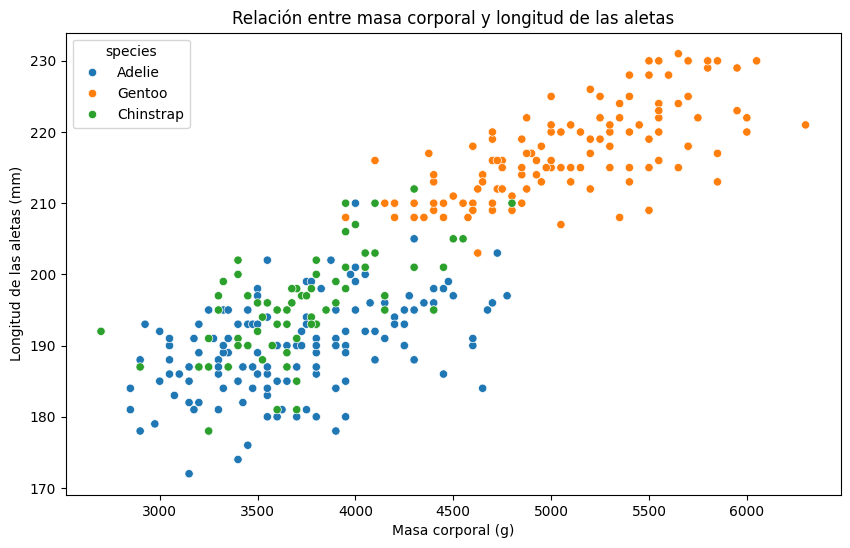

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='species', data=penguins)
plt.title('Relación entre masa corporal y longitud de las aletas')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Longitud de las aletas (mm)')
plt.show()

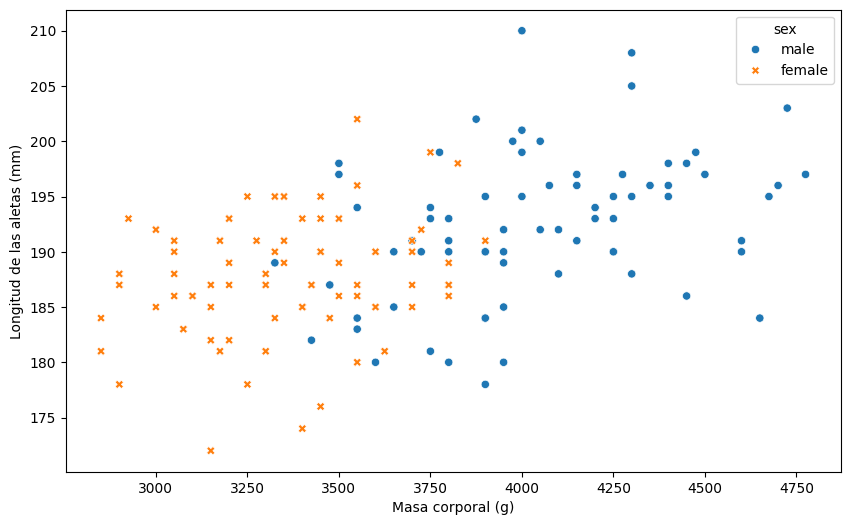

In [40]:
filter_penguin = penguins.loc[penguins['species']=='Adelie']
plt.figure(figsize=(10,6))
sns.scatterplot(x='body_mass_g', y='flipper_length_mm', hue='sex', style='sex',data=filter_penguin)
plt.xlabel('Masa corporal (g)')
plt.ylabel('Longitud de las aletas (mm)')
plt.show()
